In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
 

In [ ]:
# np.random.seed(0) makes the random numbers predictable
# With the seed reset (every time), the same set of numbers will appear every time.
np.random.seed(0) 

# create dataset 
l_data = np.random.randn(20, 2)- [3, 3] # make data close to left side
r_data = np.random.randn(20, 2)+ [3, 3] # make data close to right side

x = np.r_[l_data, r_data ] # combine l_data and r_data
print(x)


[[-1.23594765 -2.59984279]
 [-2.02126202 -0.7591068 ]
 [-1.13244201 -3.97727788]
 [-2.04991158 -3.15135721]
 [-3.10321885 -2.5894015 ]
 [-2.85595643 -1.54572649]
 [-2.23896227 -2.87832498]
 [-2.55613677 -2.66632567]
 [-1.50592093 -3.20515826]
 [-2.6869323  -3.85409574]
 [-5.55298982 -2.3463814 ]
 [-2.1355638  -3.74216502]
 [-0.73024538 -4.45436567]
 [-2.95424148 -3.18718385]
 [-1.46722079 -1.53064123]
 [-2.84505257 -2.62183748]
 [-3.88778575 -4.98079647]
 [-3.34791215 -2.84365103]
 [-1.76970932 -1.79762015]
 [-3.38732682 -3.30230275]
 [ 1.95144703  1.57998206]
 [ 1.29372981  4.9507754 ]
 [ 2.49034782  2.5619257 ]
 [ 1.74720464  3.77749036]
 [ 1.38610215  2.78725972]
 [ 2.10453344  3.3869025 ]
 [ 2.48919486  1.81936782]
 [ 2.97181777  3.42833187]
 [ 3.06651722  3.3024719 ]
 [ 2.36567791  2.63725883]
 [ 2.32753955  2.64044684]
 [ 2.18685372  1.2737174 ]
 [ 3.17742614  2.59821906]
 [ 1.36980165  3.46278226]
 [ 2.09270164  3.0519454 ]
 [ 3.72909056  3.12898291]
 [ 4.13940068  1.76517418]
 

In [ ]:
y = [0] * 20 + [1] * 20 # make l_data as class 0 and r_data as class 1


In [ ]:
# create SVM model
linear_svm = svm.SVC(kernel='linear', C=1e5) 
# SVM model train
linear_svm.fit(x, y)


SVC(C=100000.0, kernel='linear')

In [ ]:
# SVM line w1y+w0x+b=0
w = linear_svm.coef_[0]
b = linear_svm.intercept_[0]
print('w:',w)
print('b:',b)

w: [0.35384852 0.2540574 ]
b: -0.09193362430500755


<function matplotlib.pyplot.show>

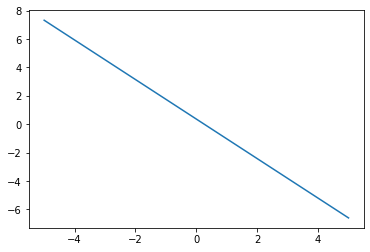

In [ ]:
# SVM line: y = (-w0x/w1)-(b/w1) =(-w0/w1)x-(b/w1) =(a)x-(new_b)
a1 = -w[0] / w[1]
new_b = -b / w[1]
svm_line_x = np.linspace(-5, 5)
svm_line_y = a1 * svm_line_x + new_b

import matplotlib.pyplot as plt 
plt.plot(svm_line_x,svm_line_y)
plt.show

In [ ]:
len(linear_svm.support_vectors_) # three data points are support vectors

3

In [ ]:
# first support vector
sv1 = linear_svm.support_vectors_[0]
print(sv1)

# line goes over first support vector y = ax+b => b = y-ax => x and y are sv1[0] sv1[1]
sv1_line = a1 * svm_line_x + (sv1[1] - a1 * sv1[0])


[-2.02126202 -0.7591068 ]


In [ ]:
# last support vector
sv_last = linear_svm.support_vectors_[-1]
sv_last_line = a1 * svm_line_x + (sv_last[1] - a1 * sv_last[0])


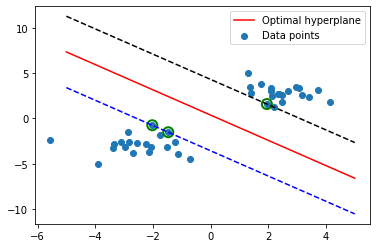

In [ ]:
# plot
plt.plot(svm_line_x, svm_line_y, 'k-', c ='r', label ='Optimal hyperplane')
plt.plot(svm_line_x, sv1_line, 'k--',c ='blue')
plt.plot(svm_line_x, sv_last_line, 'k--',c ='black')
 
# plot data points
plt.scatter(x[:,0],x[:,1], label='Data points')

# show the support vectors
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1], color='g', linewidths=2, s=100, facecolors='none')

plt.legend()
plt.show()